In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:

# Load pivoted activity and standard deviation tables for rim and puro_only
rim_no_err_corr_activity = pd.read_csv("../../output/NKX2-2/TL4B2/rim/no_err_corr/activity_mean.csv", index_col=[0, 1])
rim_no_err_corr_sd = pd.read_csv("../../output/NKX2-2/TL4B2/rim/no_err_corr/activity_std.csv", index_col=[0, 1])

rim_err_corr_activity = pd.read_csv("../../output/NKX2-2/TL4B2/rim/err_corr_100/activity_mean.csv", index_col=[0, 1])
rim_err_corr_sd = pd.read_csv("../../output/NKX2-2/TL4B2/rim/err_corr_100/activity_std.csv", index_col=[0, 1])

puro_no_err_corr_activity = pd.read_csv("../../output/NKX2-2/TL4B2/puro_only/no_err_corr/activity_mean.csv", index_col=[0, 1])
puro_no_err_corr_sd = pd.read_csv("../../output/NKX2-2/TL4B2/puro_only/no_err_corr/activity_std.csv", index_col=[0, 1])

puro_err_corr_activity = pd.read_csv("../../output/NKX2-2/TL4B2/puro_only/err_corr_100/activity_mean.csv", index_col=[0, 1])
puro_err_corr_sd = pd.read_csv("../../output/NKX2-2/TL4B2/puro_only/err_corr_100/activity_std.csv", index_col=[0, 1])

In [112]:
# Calculate mean standard deviation for each condition
summary = pd.DataFrame({
    "Condition": ["RIM No Error Correction", "RIM Error Correction", "PURO No Error Correction", "PURO Error Correction"],
    "Mean SD": [
        rim_no_err_corr_sd.mean().mean(),
        rim_err_corr_sd.mean().mean(),
        puro_no_err_corr_sd.mean().mean(),
        puro_err_corr_sd.mean().mean()
    ]
})
summary

,Condition,Mean SD
0,RIM No Error Correction,12.015587
1,RIM Error Correction,3.805093
2,PURO No Error Correction,17.810349
3,PURO Error Correction,1.859839


In [113]:
# Calculate the coefficient of variation (CV) for RIM
rim_no_err_corr_cv = rim_no_err_corr_sd / rim_no_err_corr_activity
rim_err_corr_cv = rim_err_corr_sd / rim_err_corr_activity

# Calculate the coefficient of variation (CV) for PURO
puro_no_err_corr_cv = puro_no_err_corr_sd / puro_no_err_corr_activity
puro_err_corr_cv = puro_err_corr_sd / puro_err_corr_activity

# Flatten the CV DataFrames for RIM and PURO
rim_no_err_corr_cv_flat = rim_no_err_corr_cv.stack().reset_index()
rim_no_err_corr_cv_flat.columns = ["AD", "rep", "time", "CV"]
rim_no_err_corr_cv_flat["Condition"] = "RIM No Error Correction"

rim_err_corr_cv_flat = rim_err_corr_cv.stack().reset_index()
rim_err_corr_cv_flat.columns = ["AD", "rep", "time", "CV"]
rim_err_corr_cv_flat["Condition"] = "RIM Error Correction"

puro_no_err_corr_cv_flat = puro_no_err_corr_cv.stack().reset_index()
puro_no_err_corr_cv_flat.columns = ["AD", "rep", "time", "CV"]
puro_no_err_corr_cv_flat["Condition"] = "PURO No Error Correction"

puro_err_corr_cv_flat = puro_err_corr_cv.stack().reset_index()
puro_err_corr_cv_flat.columns = ["AD", "rep", "time", "CV"]
puro_err_corr_cv_flat["Condition"] = "PURO Error Correction"


In [59]:
# Combine all CV DataFrames
cv_comparison = pd.concat([
    rim_no_err_corr_cv_flat,
    rim_err_corr_cv_flat,
    puro_no_err_corr_cv_flat,
    puro_err_corr_cv_flat
])
cv_comparison

,AD,rep,time,CV,Condition
0,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,1,0,1.019256,RIM No Error Correction
1,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,0,1.219711,RIM No Error Correction
2,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,4,0.069804,RIM No Error Correction
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,6,0.146178,RIM No Error Correction
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,24,0.532428,RIM No Error Correction
...,...,...,...,...,...
1386,TTCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,2,48,1.348982,PURO Error Correction
1387,TTCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4,48,1.148708,PURO Error Correction
1388,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,4,0.915921,PURO Error Correction
1389,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,24,0.295305,PURO Error Correction


In [60]:
cv_comparison.groupby("Condition")["CV"].mean()

Condition
PURO Error Correction       0.783416
PURO No Error Correction    1.031545
RIM Error Correction        0.804678
RIM No Error Correction     0.939255
Name: CV, dtype: float64

/tmp/ipykernel_929226/509998436.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


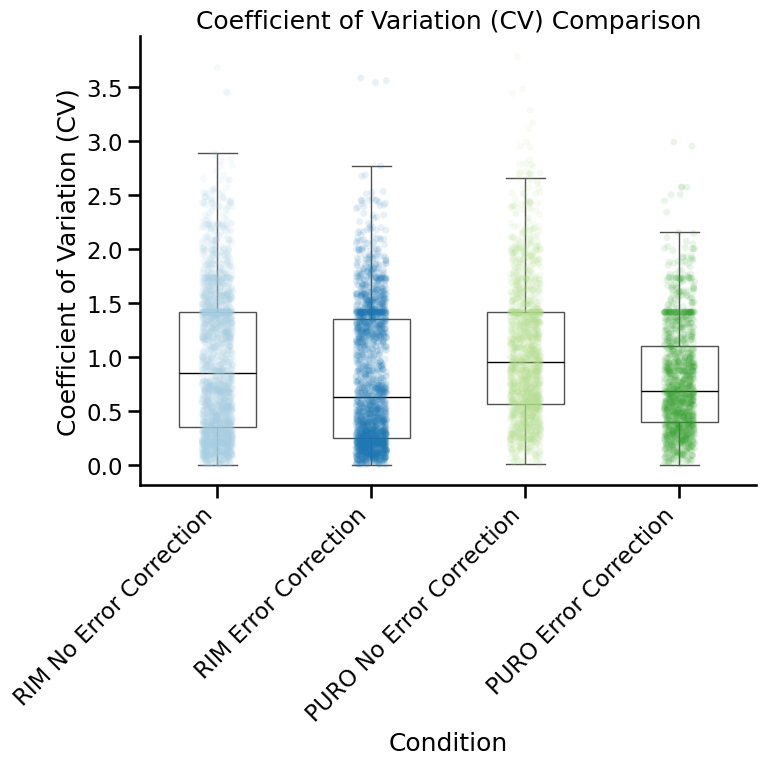

In [40]:
# Define a color palette for paired conditions
paired_palette = {
    "RIM No Error Correction": sns.color_palette("Paired")[0],
    "RIM Error Correction": sns.color_palette("Paired")[1],
    "PURO No Error Correction": sns.color_palette("Paired")[2],
    "PURO Error Correction": sns.color_palette("Paired")[3],
}

# Stripplot to compare CVs with median line
sns.set_context('talk')
plt.figure(figsize=(8, 8))
sns.stripplot(
    data=cv_comparison,
    x="Condition",
    y="CV",
    palette=paired_palette,
    jitter=True,
    alpha=0.1
)
sns.boxplot(
    data=cv_comparison,
    x="Condition",
    y="CV",
    showfliers=False,
    width=0.5,
    boxprops={'facecolor': 'None'},
    medianprops={'color': 'black'}
)
plt.title("NKX2-2")
plt.ylabel("Standard Deviation / Activity")
plt.xticks(rotation=45, ha="right")
sns.despine()
plt.tight_layout()
plt.show()


In [63]:
cv_comparison = cv_comparison.copy()

cv_comparison["Chemistry"] = cv_comparison["Condition"].apply(
    lambda x: "RIM" if "RIM" in x else "PURO"
)

cv_comparison["ErrorCorrection"] = cv_comparison["Condition"].apply(
    lambda x: "No EC" if "No Error" in x else "EC"
)

cv_comparison

,AD,rep,time,CV,Condition,Chemistry,ErrorCorrection
0,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,1,0,1.019256,RIM No Error Correction,RIM,No EC
1,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,0,1.219711,RIM No Error Correction,RIM,No EC
2,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,4,0.069804,RIM No Error Correction,RIM,No EC
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,6,0.146178,RIM No Error Correction,RIM,No EC
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,2,24,0.532428,RIM No Error Correction,RIM,No EC
...,...,...,...,...,...,...,...
1386,TTCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,2,48,1.348982,PURO Error Correction,PURO,EC
1387,TTCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4,48,1.148708,PURO Error Correction,PURO,EC
1388,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,4,0.915921,PURO Error Correction,PURO,EC
1389,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,24,0.295305,PURO Error Correction,PURO,EC


In [66]:
ec_palette = {
    "No EC": sns.color_palette("Paired")[0],
    "EC": sns.color_palette("Paired")[1],
}

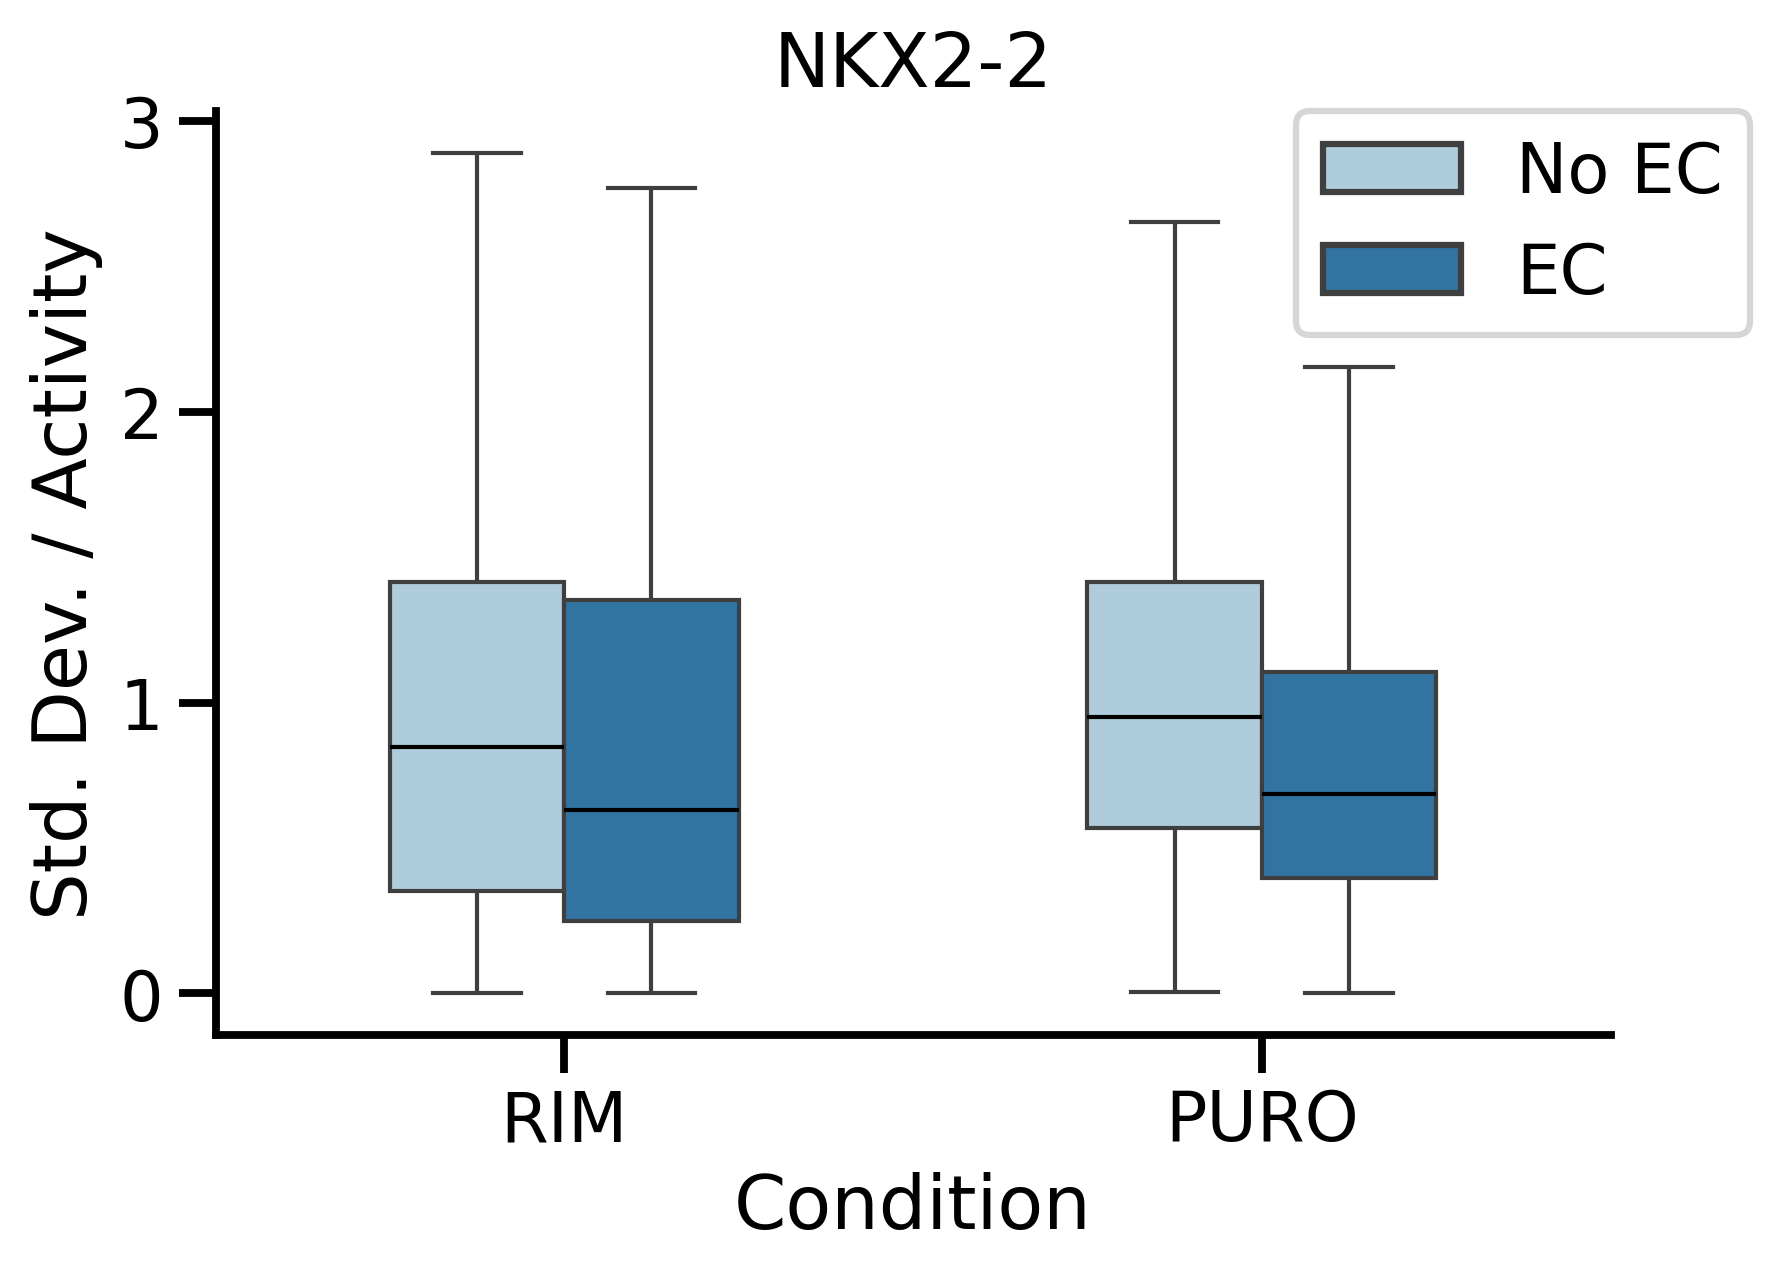

In [80]:
sns.set_context("talk")
plt.figure(figsize=(6,4), dpi = 300)

# ---- Boxplot (defines the 4 boxes) ----
sns.boxplot(
    data=cv_comparison,
    x="Chemistry",
    y="CV",
    hue="ErrorCorrection",
    width=0.5,
    showfliers=False,
    palette=ec_palette,
    #boxprops={"facecolor": "None"},
    medianprops={"color": "black"}
)

plt.xlabel("Condition")
plt.ylabel("Std. Dev. / Activity")
plt.title("NKX2-2")

plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
sns.despine()

In [91]:
# Why are there so many ADs with an activity of 1.414214?
cv_comparison[cv_comparison["CV"] == cv_comparison["CV"].mode().iloc[0]]

,AD,rep,time,CV,Condition,Chemistry,ErrorCorrection
80,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,2,4,1.414214,RIM No Error Correction,RIM,No EC
81,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,2,6,1.414214,RIM No Error Correction,RIM,No EC
144,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGGCCCAGG...,4,6,1.414214,RIM No Error Correction,RIM,No EC
146,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGGCCCAGG...,1,24,1.414214,RIM No Error Correction,RIM,No EC
169,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCA...,4,24,1.414214,RIM No Error Correction,RIM,No EC
...,...,...,...,...,...,...,...
1141,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,4,0,1.414214,PURO Error Correction,PURO,EC
1163,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,4,0,1.414214,PURO Error Correction,PURO,EC
1213,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,4,24,1.414214,PURO Error Correction,PURO,EC
1263,GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,2,0,1.414214,PURO Error Correction,PURO,EC


In [104]:
# Why are there so many ADs with an activity of 1.414214?
cv_comparison[cv_comparison["CV"] == cv_comparison["CV"].mode().iloc[0]]["AD"].iloc[-1]

'TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAG'

In [103]:
unaggregated_activ = pd.read_csv("//global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/err_corr_100/unaggregated_activities.csv", index_col=[0, 1])
unaggregated_activ= unaggregated_activ[(unaggregated_activ["rep"] == 4) & (unaggregated_activ["time"] == 48)]
unaggregated_activ

,,HawkBCs,RTBC,AD,time,rep,AD_umi_count_simple,RTBC_umi_count_simple,activity
,ADBC2,,,,,,,,
24,AAAAAT,ATACCGTCG,TATTATGACACACTTA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCAGCTTCA...,48,4,3791.0,829.0,0.218676
40,AAAAAT,CATCTTAGG,TATCTCTAATAAAGTA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,48,4,5409.0,2765.0,0.511185
54,AAAACC,AAGCTGCGA,AGTAATATAAGGGTAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,48,4,1344.0,5224.0,3.886905
60,AAAACC,ATGCGATAG,AAACCCTGATTAAAAT,GCCCAGGACATCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,48,4,1929.0,780.0,0.404355
70,AAAACC,ATGCTCAGT,ATAACTATCCTCCGCC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,48,4,117.0,81.0,0.692308
...,...,...,...,...,...,...,...,...,...
13066,TTTGGG,CCATTAACG,TAAGCGGTTGGCCTTA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,48,4,7501.0,0.0,0.000000
13079,TTTGGT,CAAGTCTGG,TAGAAAAAAATCGAAA,GCCCAGGAGCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,48,4,678.0,451.0,0.665192
13091,TTTGGT,CCAGCTAAT,TTAGCGTTGAAAAGGC,AGCACCGCTCCTCCCACCGACGTGAGCCTGGGCGACGAGCTGCACC...,48,4,0.0,248.0,inf


In [106]:
unaggregated_activ[unaggregated_activ["AD"] == "TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAG"]

,,HawkBCs,RTBC,AD,time,rep,AD_umi_count_simple,RTBC_umi_count_simple,activity
,ADBC2,,,,,,,,
4132,ATGGGG,AGTACATGC,ATTTAACGGATAAAGA,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGG...,48,4,259.0,143.0,0.552124
10597,TAGTAA,AGTACATGC,TCAATCGCTTAAGGTA,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGG...,48,4,28.0,0.0,0.000000


In [110]:
grouped_unaggregated_activ = unaggregated_activ.groupby(["AD", "time", "rep"])["activity"].agg(["mean", "std"]).reset_index()
grouped_unaggregated_activ[grouped_unaggregated_activ["AD"] == "TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAG"]

,AD,time,rep,mean,std
212,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGG...,48,4,0.276062,0.39041


In [114]:
0.39041 / 0.276062

1.414211300360064

In [ ]:
# It looks like these are cases where there are 2 replicates for the AD, but one has an activity of zero. 

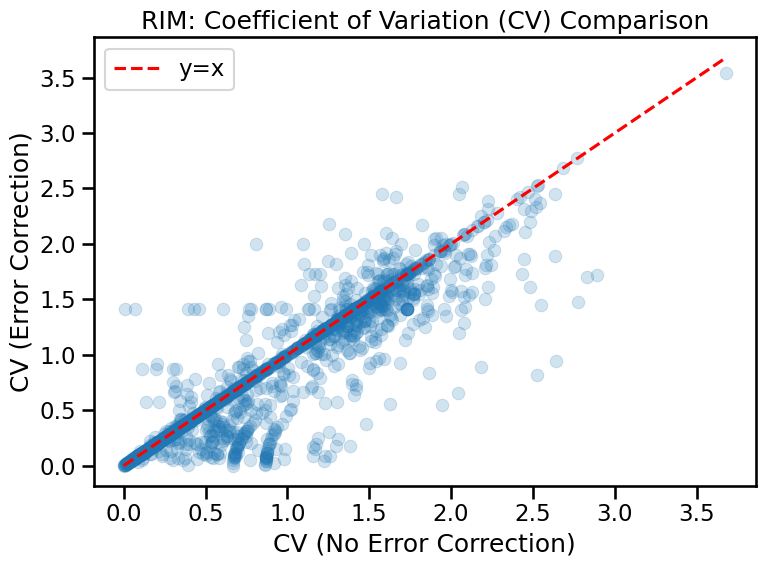

In [37]:
# Scatterplot for RIM CVs
rim_cv_comparison = pd.merge(
    rim_no_err_corr_cv_flat,
    rim_err_corr_cv_flat,
    on=["AD", "rep", "time"],
    suffixes=("_NoErrCorr", "_ErrCorr")
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rim_cv_comparison,
    x="CV_NoErrCorr",
    y="CV_ErrCorr",
    alpha=0.2,
    edgecolor=None
)
plt.plot([0, rim_cv_comparison["CV_NoErrCorr"].max()], [0, rim_cv_comparison["CV_NoErrCorr"].max()], 'r--', label="y=x")
plt.title("RIM: Coefficient of Variation (CV) Comparison")
plt.xlabel("CV (No Error Correction)")
plt.ylabel("CV (Error Correction)")
plt.legend()
plt.tight_layout()
plt.show()

# Scatterplot for PURO CVs
puro_cv_comparison = pd.merge(
    puro_no_err_corr_cv_flat,
    puro_err_corr_cv_flat,
    on=["AD", "rep", "time"],
    suffixes=("_NoErrCorr", "_ErrCorr")
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=puro_cv_comparison,
    x="CV_NoErrCorr",
    y="CV_ErrCorr",
    alpha=0.2,
    edgecolor=None
)
plt.plot([0, puro_cv_comparison["CV_NoErrCorr"].max()], [0, puro_cv_comparison["CV_NoErrCorr"].max()], 'r--', label="y=x")
plt.title("PURO: Coefficient of Variation (CV) Comparison")
plt.xlabel("CV (No Error Correction)")
plt.ylabel("CV (Error Correction)")
plt.legend()
plt.tight_layout()
plt.show()

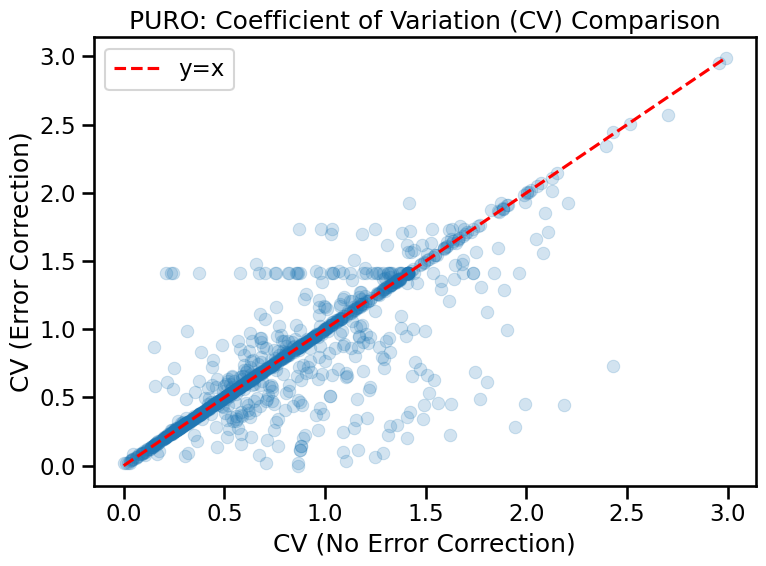

In [ ]:


# Print summary statistics
print(summary)a

# Plot comparison of standard deviations
plt.figure(figsize=(8, 6))
sns.barplot(data=summary, x="Condition", y="Mean SD", palette="viridis")
plt.title("Comparison of Standard Deviations (Error Correction vs. No Error Correction)")
plt.ylabel("Mean Standard Deviation")
plt.xticks(rotation=45, ha="right")
sns.despine()
plt.tight_layout()
plt.show()